# Predicting Physical Activities from Smartphone Accelerometer Data: A Machine Learning Approach

In [160]:
pwd # to see if the file directory has the correct address

'/home/egeozmeral/Desktop/Python/Using Python for Research/Final Project'

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import scipy.stats as ss
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from timeit import default_timer as timer

start = timer()
end = timer()
print(end - start)

1.140000040322775e-05


## Load Data

In [165]:
train_time_series = pd.read_csv("train_time_series.csv")

train_time_series.head()

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450


In [166]:
train_labels = pd.read_csv("train_labels.csv")

train_labels.head()

,Unnamed: 0,timestamp,UTC time,label
0,20589,1565109931087,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,1


## Data Cleaning

In [124]:
print(merged_data.isnull().sum())

Unnamed: 0_x    0
timestamp       0
UTC time_x      0
accuracy        0
x               0
y               0
z               0
Unnamed: 0_y    0
UTC time_y      0
label           0
dtype: int64


In [170]:
nm_x = (x-min(x))/(max(x) - min(x))
nm_y = (y-min(y))/(max(y) - min(y))
nm_z = (z-min(z))/(max(z) - min(z))

merged_data['x'] = nm_x; merged_data['y'] = nm_y; merged_data['z'] = nm_z

nm_merged_data = merged_data

nm_merged_data

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,Unnamed: 0_y,UTC time_y,label
0,20589,1565109931087,2019-08-06T16:45:31.087,unknown,0.297871,0.661571,0.336370,20589,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,unknown,0.281090,0.639869,0.375995,20599,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,unknown,0.287519,0.638303,0.398209,20609,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,unknown,0.284633,0.647340,0.370856,20619,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,unknown,0.284569,0.643054,0.385213,20629,2019-08-06T16:45:35.097,1
...,...,...,...,...,...,...,...,...,...,...
370,24289,1565110302030,2019-08-06T16:51:42.030,unknown,0.247142,0.811982,0.345848,24289,2019-08-06T16:51:42.030,4
371,24299,1565110303032,2019-08-06T16:51:43.032,unknown,0.496423,0.704803,0.507300,24299,2019-08-06T16:51:43.032,4
372,24309,1565110304034,2019-08-06T16:51:44.034,unknown,0.434469,0.167002,0.750587,24309,2019-08-06T16:51:44.034,4
373,24319,1565110305037,2019-08-06T16:51:45.037,unknown,0.218129,0.685891,0.269050,24319,2019-08-06T16:51:45.037,4


## Visualization

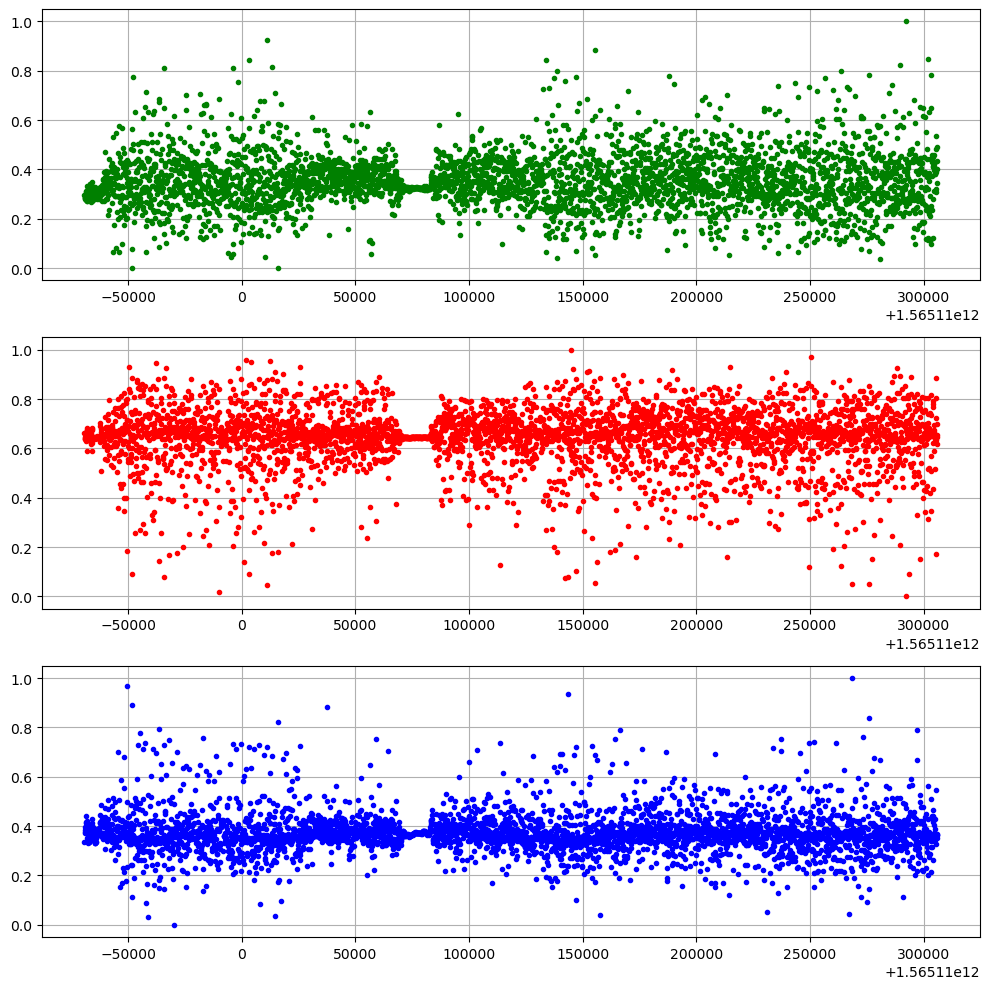

In [136]:
t = train_time_series["timestamp"]

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

labels = [1,2,3]
colors = ['g.', 'r.', 'b.']

for j in range(len(colors)):
    axis = ["x"]
    
    axes[j].plot(t,x,colors[j])
    axes[j].grid()
        
    plt.tight_layout()
    plt.show()

axes[0].plot(t,nm_x,"g.")
axes[0].grid()

axes[1].plot(t,nm_y,"r.")
axes[1].grid()

axes[2].plot(t,nm_z,"b.")
axes[2].grid()

plt.tight_layout()
plt.show()

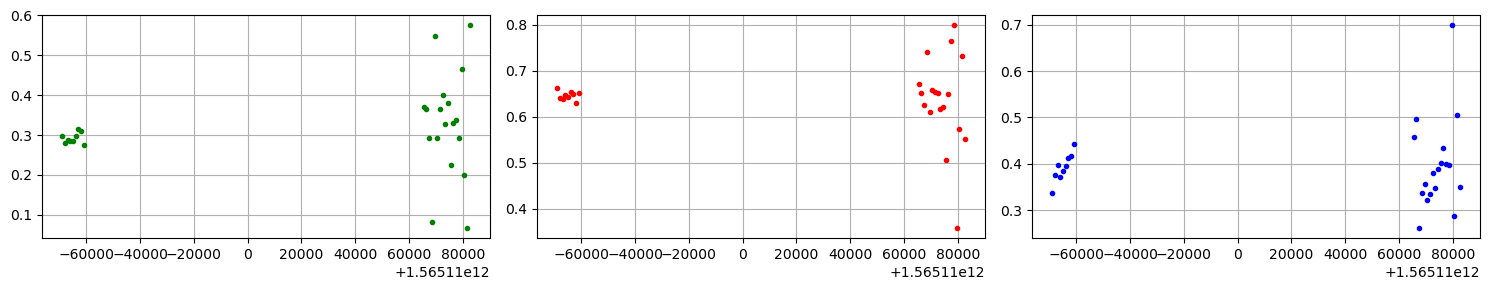

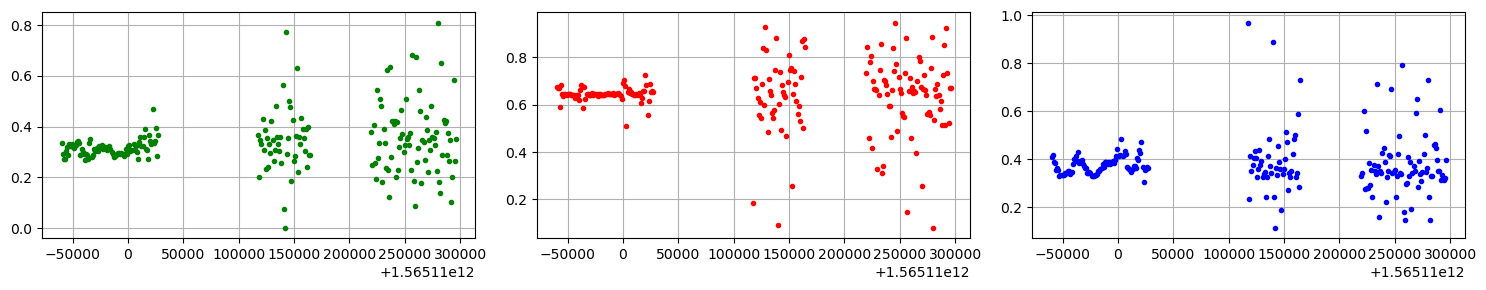

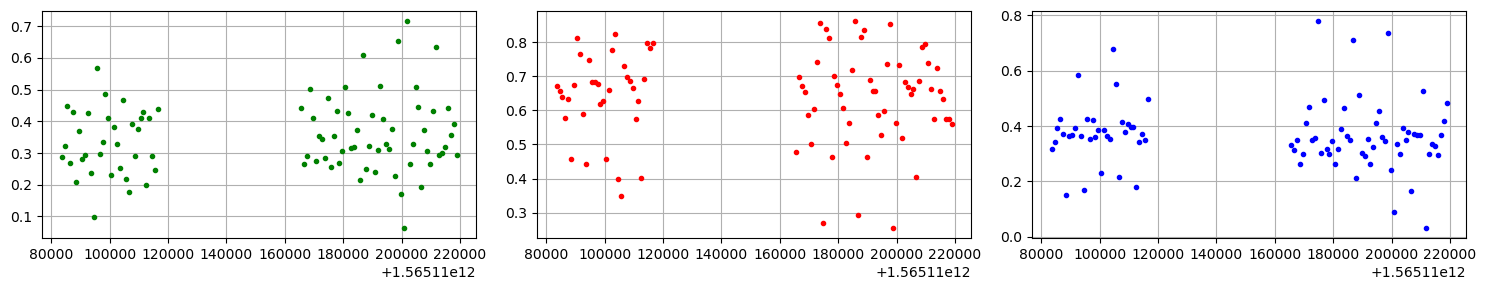

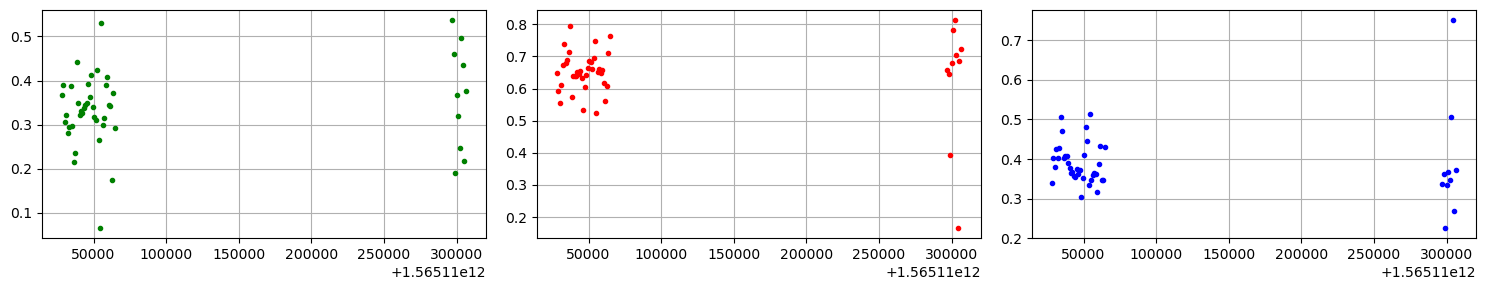

In [217]:
labels = [1,2,3,4]
colors = ['g.', 'r.', 'b.']
for i in labels:
    label = nm_merged_data[nm_merged_data["label"]== i]
    t = label["timestamp"]; x = label["x"]; y = label["y"]; z = label["z"]
    acc = [x, y, z]
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 3))
    for j in range(len(colors)):
        axes[j].plot(t,acc[j],colors[j])
        axes[j].grid()
        
    plt.tight_layout()
    plt.show()    

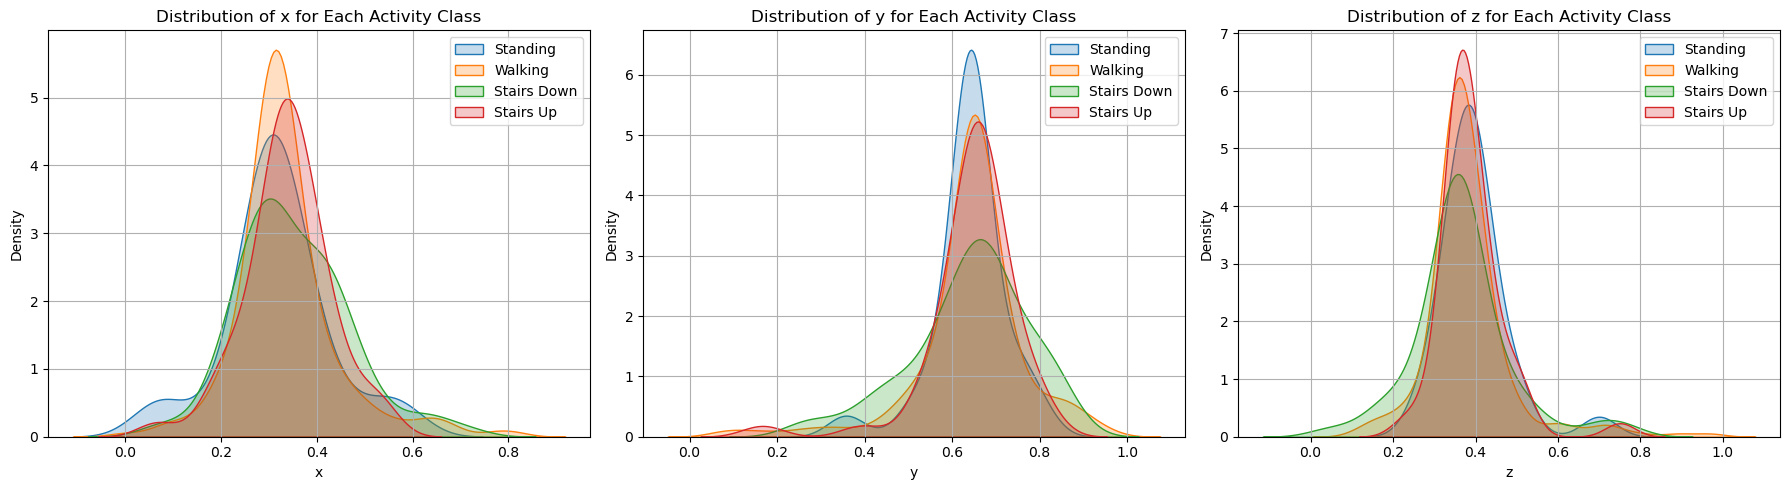

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `merged_data` contains features and labels
features = ['x', 'y', 'z']
activity_classes = {1: 'Standing', 2: 'Walking', 3: 'Stairs Down', 4: 'Stairs Up'}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(features):
    # Plot for each feature in the corresponding subplot
    for label, activity in activity_classes.items():
        sns.kdeplot(
            merged_data[merged_data['label'] == label][feature],
            label=activity,
            fill=True,
            ax=axes[i]  # Specify which subplot to plot on
        )
    axes[i].set_title(f'Distribution of {feature} for Each Activity Class')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid()

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

## Correlation Analysis

In [137]:
merged_data.head()

cols = merged_data.columns.tolist()
# cols: columns of the data frame merged_data

cols = cols[:-3] + cols[-1:]
# cols[:-3]: columns without the last 3 columns
# cols[-1:] the last column

df = merged_data[cols]
df = df.iloc[:, 4:] # the last 4 columns of df
df

,x,y,z,label
0,0.297871,0.661571,0.336370,1
1,0.281090,0.639869,0.375995,1
2,0.287519,0.638303,0.398209,1
3,0.284633,0.647340,0.370856,1
4,0.284569,0.643054,0.385213,1
...,...,...,...,...
370,0.247142,0.811982,0.345848,4
371,0.496423,0.704803,0.507300,4
372,0.434469,0.167002,0.750587,4
373,0.218129,0.685891,0.269050,4


## Data Manipulation

In [75]:
acc = np.sqrt(x**2 + y**2 + z**2)
train_time_series['magnitude'] = acc

train_time_series

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z,magnitude
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046,0.937429
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554,1.021548
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467,1.037644
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,0.991568
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450,1.012993
...,...,...,...,...,...,...,...,...
3739,24325,1565110305638,2019-08-06T16:51:45.638,unknown,0.024384,-0.710709,0.030304,0.711772
3740,24326,1565110305738,2019-08-06T16:51:45.738,unknown,0.487228,-1.099136,-0.015213,1.202382
3741,24327,1565110305838,2019-08-06T16:51:45.838,unknown,0.369446,-0.968506,0.036713,1.037228
3742,24328,1565110305939,2019-08-06T16:51:45.939,unknown,0.167877,-0.802826,0.049805,0.821701


In [76]:
train_labels

,Unnamed: 0,timestamp,UTC time,label
0,20589,1565109931087,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,1
...,...,...,...,...
370,24289,1565110302030,2019-08-06T16:51:42.030,4
371,24299,1565110303032,2019-08-06T16:51:43.032,4
372,24309,1565110304034,2019-08-06T16:51:44.034,4
373,24319,1565110305037,2019-08-06T16:51:45.037,4


In [104]:
merged_data = pd.merge(train_time_series, train_labels, on="timestamp", how="inner")

merged_data

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,magnitude,Unnamed: 0_y,UTC time_y,label
0,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,0.991568,20589,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,unknown,0.013718,-0.852371,-0.000870,0.852482,20599,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,unknown,0.145584,-1.007843,-0.036819,1.018969,20609,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,unknown,-0.099380,-1.209686,0.304489,1.251372,20619,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,unknown,0.082794,-1.001434,-0.025375,1.005171,20629,2019-08-06T16:45:35.097,1
...,...,...,...,...,...,...,...,...,...,...,...
370,24289,1565110302030,2019-08-06T16:51:42.030,unknown,-0.641953,-1.469177,0.301041,1.631322,24289,2019-08-06T16:51:42.030,4
371,24299,1565110303032,2019-08-06T16:51:43.032,unknown,-0.171616,-0.366074,-0.059082,0.408598,24299,2019-08-06T16:51:43.032,4
372,24309,1565110304034,2019-08-06T16:51:44.034,unknown,0.401810,-1.077698,0.258911,1.178948,24309,2019-08-06T16:51:44.034,4
373,24319,1565110305037,2019-08-06T16:51:45.037,unknown,0.330338,-1.470062,0.303894,1.537061,24319,2019-08-06T16:51:45.037,4


## Statistical Summary

In [151]:
mean_x = x.mean(); mean_y = y.mean(); mean_z = z.mean()
print(mean_x, mean_y, mean_z)

std_x = x.std(); std_y = y.std(); std_z = z.std()
print(std_x, std_y, std_z)

median_x = x.median(); median_y = y.median(); median_z = z.median()
print(median_x, median_y, median_z)

0.19582144419352213 -1.005255580967308 0.08443472528050089
0.3956977277739057 0.4511784714829794 0.350817476211766
0.1617279052734375 -0.9580154418945312 0.05211639404296875


## Visualization

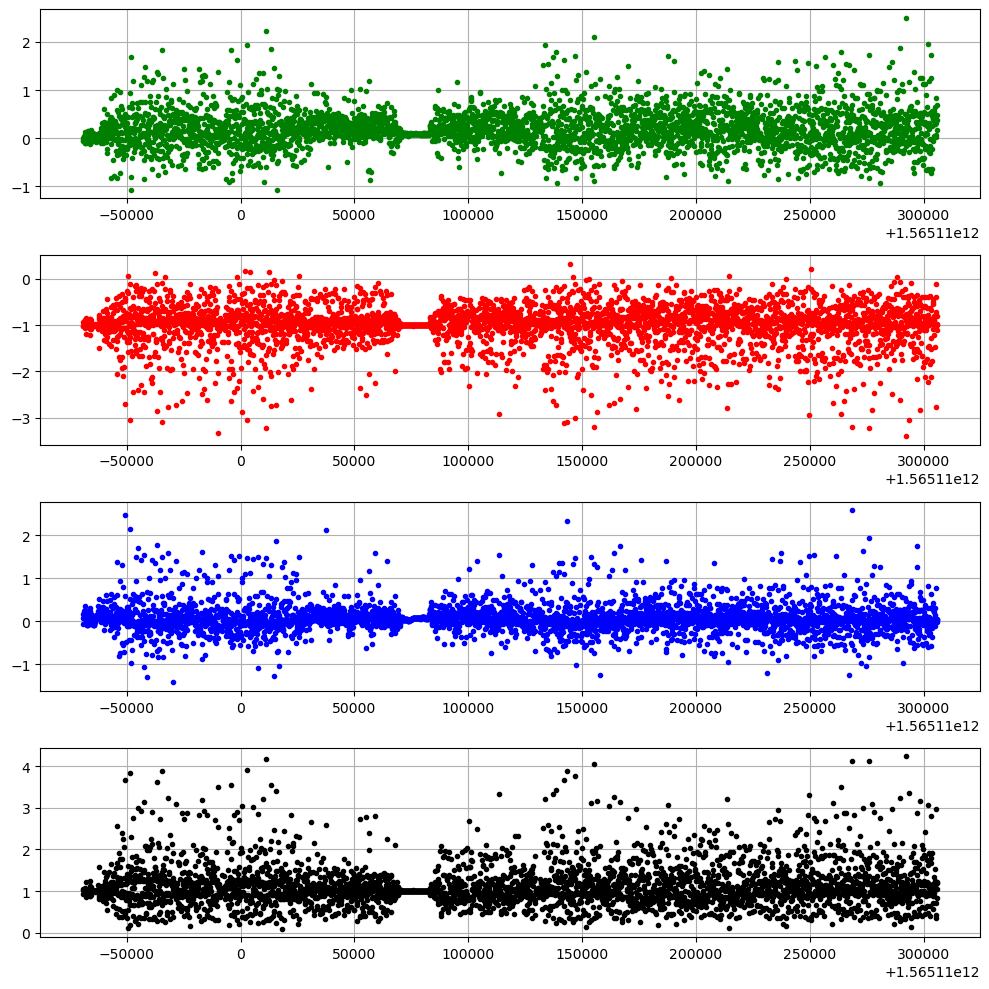

In [110]:
t = train_time_series["timestamp"]

# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 10))

axes[0].plot(t,x,"g.")
axes[0].grid()

axes[1].plot(t,y,"r.")
axes[1].grid()

axes[2].plot(t,z,"b.")
axes[2].grid()

axes[3].plot(t,acc,"k.")
axes[3].grid()

plt.tight_layout()
plt.show()

In [111]:
merged_data.head()

,Unnamed: 0_x,timestamp,UTC time_x,accuracy,x,y,z,magnitude,Unnamed: 0_y,UTC time_y,label
0,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985,0.991568,20589,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,unknown,0.013718,-0.852371,-0.000870,0.852482,20599,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,unknown,0.145584,-1.007843,-0.036819,1.018969,20609,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,unknown,-0.099380,-1.209686,0.304489,1.251372,20619,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,unknown,0.082794,-1.001434,-0.025375,1.005171,20629,2019-08-06T16:45:35.097,1


In [112]:
merged_data.head()

cols = merged_data.columns.tolist()
# cols: columns of the data frame merged_data

cols = cols[:-3] + cols[-1:]
# cols[:-3]: columns without the last 3 columns
# cols[-1:] the last column

df = merged_data[cols]
df = df.iloc[:, 4:] # the last 4 columns of df
df

,x,y,z,magnitude,label
0,-0.053802,-0.987701,0.068985,0.991568,1
1,0.013718,-0.852371,-0.000870,0.852482,1
2,0.145584,-1.007843,-0.036819,1.018969,1
3,-0.099380,-1.209686,0.304489,1.251372,1
4,0.082794,-1.001434,-0.025375,1.005171,1
...,...,...,...,...,...
370,-0.641953,-1.469177,0.301041,1.631322,4
371,-0.171616,-0.366074,-0.059082,0.408598,4
372,0.401810,-1.077698,0.258911,1.178948,4
373,0.330338,-1.470062,0.303894,1.537061,4


In [113]:
df['standing'] = df['label'].apply(lambda x: 1 if x == 1 else 0)
df['walking'] = df['label'].apply(lambda x: 1 if x == 2 else 0)
df['stairs down'] = df['label'].apply(lambda x: 1 if x == 3 else 0)
df['stairs up'] = df['label'].apply(lambda x: 1 if x == 4 else 0)
df.drop(columns=['label'], inplace=True)
df

,x,y,z,magnitude,standing,walking,stairs down,stairs up
0,-0.053802,-0.987701,0.068985,0.991568,1,0,0,0
1,0.013718,-0.852371,-0.000870,0.852482,1,0,0,0
2,0.145584,-1.007843,-0.036819,1.018969,1,0,0,0
3,-0.099380,-1.209686,0.304489,1.251372,1,0,0,0
4,0.082794,-1.001434,-0.025375,1.005171,1,0,0,0
...,...,...,...,...,...,...,...,...
370,-0.641953,-1.469177,0.301041,1.631322,0,0,0,1
371,-0.171616,-0.366074,-0.059082,0.408598,0,0,0,1
372,0.401810,-1.077698,0.258911,1.178948,0,0,0,1
373,0.330338,-1.470062,0.303894,1.537061,0,0,0,1


In [116]:
corr_df = pd.DataFrame.corr(df)
corr_df

,x,y,z,magnitude,standing,walking,stairs down,stairs up
x,1.000000,-0.315754,0.288981,0.376870,-0.092913,-0.057000,0.051670,0.091680
y,-0.315754,1.000000,-0.327332,-0.944749,0.012387,0.024536,-0.009746,-0.033904
z,0.288981,-0.327332,1.000000,0.388018,-0.018962,-0.111158,0.074216,0.086114
magnitude,0.376870,-0.944749,0.388018,1.000000,-0.074147,0.034050,-0.017834,0.029772
standing,-0.092913,0.012387,-0.018962,-0.074147,1.000000,-0.319392,-0.154238,-0.105440
walking,-0.057000,0.024536,-0.111158,0.034050,-0.319392,1.000000,-0.634940,-0.434055
stairs down,0.051670,-0.009746,0.074216,-0.017834,-0.154238,-0.634940,1.000000,-0.209610
stairs up,0.091680,-0.033904,0.086114,0.029772,-0.105440,-0.434055,-0.209610,1.000000


**The most significant correlation is between z-label and x-label**

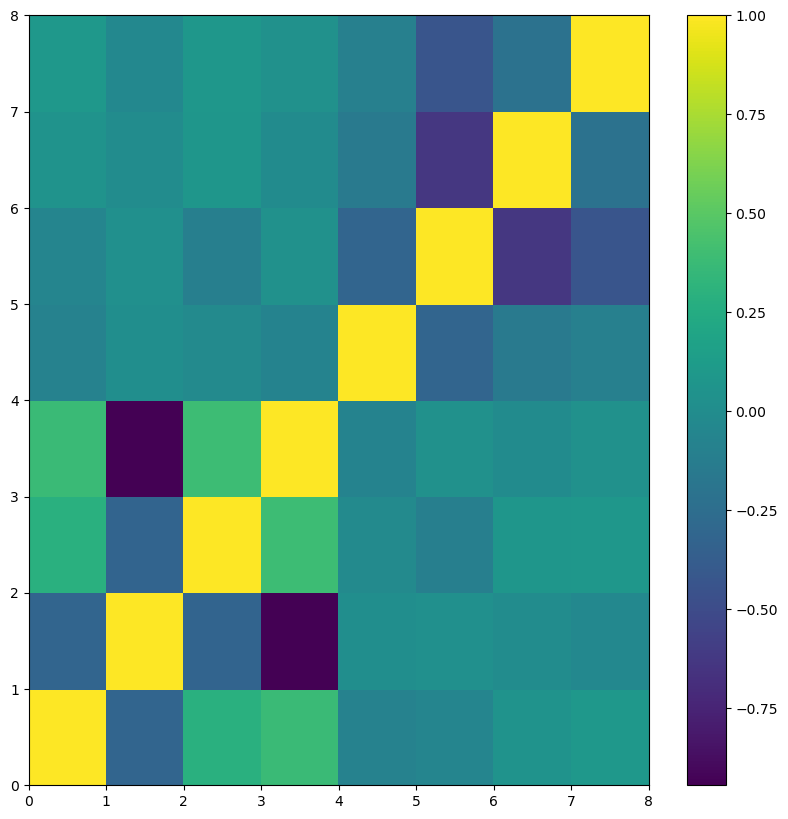

In [119]:
plt.figure(figsize=(10,10))
plt.pcolor(corr_df)
plt.colorbar()
plt.savefig("corr_acc-labels")
plt.show()

In [18]:
df = merged_data['label']

df = df.reset_index(drop=True)

df

0      1
1      1
2      1
3      1
4      1
      ..
370    4
371    4
372    4
373    4
374    4
Name: label, Length: 375, dtype: int64

In [137]:
mean_x = train_time_series['x'].mean()
mean_y = train_time_series['y'].mean()
mean_z = train_time_series['z'].mean()
print(mean_x, mean_y, mean_z)

std_x = train_time_series['x'].std()
std_y = train_time_series['y'].std()
std_z = train_time_series['z'].std()
print(std_x, std_y, std_z)

median_x = train_time_series['x'].median()
median_y = train_time_series['y'].median()
median_z = train_time_series['z'].median()
print(median_x, median_y, median_z)

0.19582144419352213 -1.005255580967308 0.08443472528050089
0.3956977277739057 0.4511784714829794 0.350817476211766
0.1617279052734375 -0.9580154418945312 0.05211639404296875


In [138]:
test_time_series = pd.read_csv("test_time_series.csv")

test_time_series

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,24330,1565110306139,2019-08-06T16:51:46.139,unknown,0.034286,-1.504456,0.157623
1,24331,1565110306239,2019-08-06T16:51:46.239,unknown,0.409164,-1.038544,0.030975
2,24332,1565110306340,2019-08-06T16:51:46.340,unknown,-0.234390,-0.984558,0.124771
3,24333,1565110306440,2019-08-06T16:51:46.440,unknown,0.251114,-0.787003,0.054810
4,24334,1565110306540,2019-08-06T16:51:46.540,unknown,0.109924,-0.169510,0.235550
...,...,...,...,...,...,...,...
1245,25575,1565110430975,2019-08-06T16:53:50.975,unknown,0.036499,-0.724823,0.553802
1246,25576,1565110431075,2019-08-06T16:53:51.075,unknown,-0.159241,0.307022,0.142410
1247,25577,1565110431175,2019-08-06T16:53:51.175,unknown,-0.037964,-0.673706,1.065445
1248,25578,1565110431275,2019-08-06T16:53:51.275,unknown,0.255707,-1.485397,-0.013336


In [82]:
test_labels = pd.read_csv("test_labels.csv")

test_labels

,Unnamed: 0,timestamp,UTC time,label
0,24339,1565110307041,2019-08-06T16:51:47.041,NaN
1,24349,1565110308043,2019-08-06T16:51:48.043,NaN
2,24359,1565110309046,2019-08-06T16:51:49.046,NaN
3,24369,1565110310048,2019-08-06T16:51:50.048,NaN
4,24379,1565110311050,2019-08-06T16:51:51.050,NaN
...,...,...,...,...
120,25539,1565110427366,2019-08-06T16:53:47.366,NaN
121,25549,1565110428369,2019-08-06T16:53:48.369,NaN
122,25559,1565110429371,2019-08-06T16:53:49.371,NaN
123,25569,1565110430373,2019-08-06T16:53:50.373,NaN
